# Accidentes de tránsito en New York

En este caso práctico haremos la exploración de un data set aplicando algunas de las etapas de los procesos de ciencia de datos. Haremos transformación y limpiea de los datos. Entenderemos cómo extraer valor de los datos desde una perspectiva exploratoria

El caso estará estructurado así

- Explorar la estructura de los datos
- Hacer un análisis exploratorio y descriptivo de las principales variables
- Sacar conclusiones e hipótesis de análisis a partir de los hallazgos

## Lirerías utilizadas durante la clase

- [dplyr](https://github.com/tidyverse/dplyr): Una herramienta rápida y consistente para trabajar con marcos de datos como objetos, tanto en memoria como sin memoria.
- [ggplot2](https://github.com/tidyverse/ggplot2): Es un sistema para crear gráficos de forma declarativa, basado en The Grammar of Graphics.
- [reshape](https://github.com/cran/reshape2): Paquete de remodelación de datos.

In [8]:
library(dplyr)
library(ggplot2)
library(reshape)

**Contexto:** New York ha tenido un incremento en el número de accidentes de tránsito constante y se requiere analizar datos de estos accidentes del periodo Enero 2018 - Agosto 2019.

**Problema de negocio:** Identificar patrones en la data que permita tomar decisiones informadas dirigidas hacia la planeación de políticas públicas de caracter preventivo para diminuir el número y/o gravedad de los accidentes

Definimos nuestra ruta de trabajo, dónde tenemos guardados nuestros datos

In [ ]:
setwd('/root/Documentos/UN/UN_2020_2/DCD/module_4/class_1/r_jupyter')
#setwd('C:/Users/Juliana/Desktop/Diplomado/D_2020/Casos/Casos/EDA') 

In [3]:
accidentes <- read.csv('data/accidents.csv',header=T,sep=';')
head(accidentes)

,DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,ON.STREET.NAME,NUMBER.OF.PEDESTRIANS.INJURED,NUMBER.OF.PEDESTRIANS.KILLED,NUMBER.OF.CYCLIST.INJURED,⋯,CONTRIBUTING.FACTOR.VEHICLE.2,CONTRIBUTING.FACTOR.VEHICLE.3,CONTRIBUTING.FACTOR.VEHICLE.4,CONTRIBUTING.FACTOR.VEHICLE.5,COLLISION_ID,VEHICLE.TYPE.CODE.1,VEHICLE.TYPE.CODE.2,VEHICLE.TYPE.CODE.3,VEHICLE.TYPE.CODE.4,VEHICLE.TYPE.CODE.5
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
1,09/26/2018,12:12,BRONX,10454,40.80899,-73.91132,,0,0,0,⋯,,,,,3988123,Sedan,,,,
2,09/25/2018,16:30,BROOKLYN,11236,40.63600,-73.91251,FLATLANDS AVENUE,1,0,0,⋯,,,,,3987962,Sedan,,,,
3,08/22/2019,19:30,QUEENS,11101,40.75549,-73.93953,,0,0,0,⋯,,,,,4193132,Sedan,,,,
4,09/23/2018,13:10,QUEENS,11367,NA,NA,MAIN STREET,0,0,1,⋯,Unspecified,,,,3985962,Bike,Station Wagon/Sport Utility Vehicle,,,
5,08/20/2019,22:40,BRONX,10468,40.86834,-73.90127,,0,0,0,⋯,Unspecified,,,,4192111,Sedan,Sedan,,,
6,08/20/2019,7:15,QUEENS,11354,NA,NA,,0,0,0,⋯,,,,,4191802,Sedan,,,,


Se tienen las variables

- **BOROUGH:** Vecindario donde ocurrió el accidente
- **COLLISION_ID:** ID del accidente
- **CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5):** Razones del accidente
- **CROSS STREET NAME:** La calle cruzada más cercana en la que pasó el accidente
- **DATE:** Fecha del accidente
- **TIME:** Hora del accidente
- **LATITUDE:** Latitud del accidente
- **LONGITUDE:** Longitud del accidente
- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED:** Número de heridos de cada tipo
- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED:** Número de muertos de cada tipo
- **ON STREET NAME:** Calle de accidente
- **VEHICLE TYPE CODE (1, 2, 3, 4, 5):** Tipo de vehículo involucrado en el accidente
- **ZIP CODE:** Código zip del accidente

In [4]:
print(nrow(accidentes))

[1] 238522


In [5]:
print(ncol(accidentes))

[1] 24


**¿Han incrementado el número de accidentes en el periodo de observación?**

Para hacer éste análisis primero debemos cambiar el formato de la columna de la fecha para manejarla apropiadamente.

In [6]:
accidentes$DATE <-as.Date(accidentes$DATE,'%m/%d/%Y')

Con esta transformación podemos extraer el mes de la fecha y hacer un análisis por meses. ¿Qué podemos concluir del número de accidentes por mes?

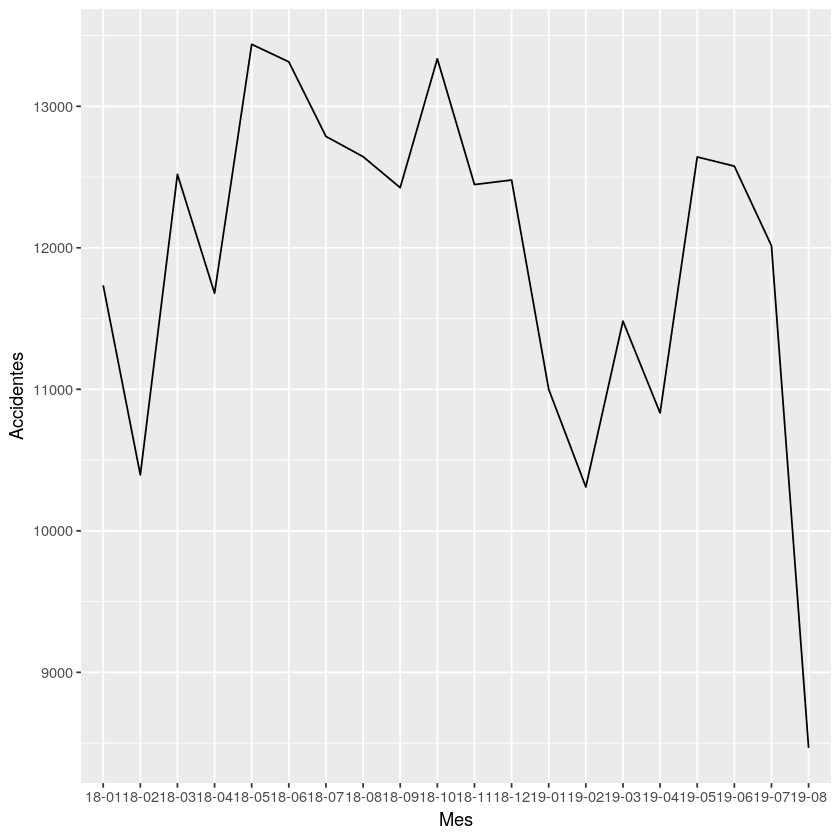

In [7]:
accidentes$m_y <- strftime(accidentes$DATE,'%y-%m')
accidentes_mes <- as.data.frame(accidentes %>% count(m_y))
ggplot(accidentes_mes, aes(x=m_y, y=n,group=1)) +
  geom_line()+xlab("Mes")+ylab("Accidentes")